**Step 1: Data Acquisition, Loading & Understanding**



In [2]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the file into a Pandas DataFrame.
try:
    df = pd.read_csv('supply_chain_data.csv')
except FileNotFoundError:
    print("The file 'e_commerce_data.csv' was not found. Please ensure the file is in the correct directory.")

In [3]:
# Display the first 5 rows to verify
df.head()


,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,...,Location,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs
0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,58,7,96,...,Mumbai,29,215,29,46.279879,Pending,0.226410,Road,Route B,187.752075
1,skincare,SKU1,14.843523,95,736,7460.900065,Female,53,30,37,...,Mumbai,23,517,30,33.616769,Pending,4.854068,Road,Route B,503.065579
2,haircare,SKU2,11.319683,34,8,9577.749626,Unknown,1,10,88,...,Mumbai,12,971,27,30.688019,Pending,4.580593,Air,Route C,141.920282
3,skincare,SKU3,61.163343,68,83,7766.836426,Non-binary,23,13,59,...,Kolkata,24,937,18,35.624741,Fail,4.746649,Rail,Route A,254.776159
4,skincare,SKU4,4.805496,26,871,2686.505152,Non-binary,5,3,56,...,Delhi,5,414,3,92.065161,Fail,3.145580,Air,Route A,923.440632


In [4]:
# display the last 5 rows to verify
df.tail()

,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,...,Location,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs
95,haircare,SKU95,77.903927,65,672,7386.363944,Unknown,15,14,26,...,Mumbai,18,450,26,58.890686,Pending,1.210882,Air,Route A,778.864241
96,cosmetics,SKU96,24.423131,29,324,7698.424766,Non-binary,67,2,32,...,Mumbai,28,648,28,17.803756,Pending,3.872048,Road,Route A,188.742141
97,haircare,SKU97,3.526111,56,62,4370.916580,Male,46,19,4,...,Mumbai,10,535,13,65.765156,Fail,3.376238,Road,Route A,540.132423
98,skincare,SKU98,19.754605,43,913,8525.952560,Female,53,1,27,...,Chennai,28,581,9,5.604691,Pending,2.908122,Rail,Route A,882.198864
99,haircare,SKU99,68.517833,17,627,9185.185829,Unknown,55,8,59,...,Chennai,29,921,2,38.072899,Fail,0.346027,Rail,Route B,210.743009


In [5]:
# Dimensions of dataset
df.shape
     

(100, 24)

In [6]:
# Column names
df.columns

Index(['Product type', 'SKU', 'Price', 'Availability',
       'Number of products sold', 'Revenue generated', 'Customer demographics',
       'Stock levels', 'Lead times', 'Order quantities', 'Shipping times',
       'Shipping carriers', 'Shipping costs', 'Supplier name', 'Location',
       'Lead time', 'Production volumes', 'Manufacturing lead time',
       'Manufacturing costs', 'Inspection results', 'Defect rates',
       'Transportation modes', 'Routes', 'Costs'],
      dtype='object')

In [7]:
# Dataset summary information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Product type             100 non-null    object 
 1   SKU                      100 non-null    object 
 2   Price                    100 non-null    float64
 3   Availability             100 non-null    int64  
 4   Number of products sold  100 non-null    int64  
 5   Revenue generated        100 non-null    float64
 6   Customer demographics    100 non-null    object 
 7   Stock levels             100 non-null    int64  
 8   Lead times               100 non-null    int64  
 9   Order quantities         100 non-null    int64  
 10  Shipping times           100 non-null    int64  
 11  Shipping carriers        100 non-null    object 
 12  Shipping costs           100 non-null    float64
 13  Supplier name            100 non-null    object 
 14  Location                 10

The dataset has only Nine(9) categorical features and the remaining are Numerical.

**Step 2: Data Cleaning and Preprocessing**
Things to do:

>Check for missing values, duplicates, and incorrect data types.

>Convert numerical columns that are stored as objects/strings into a float or integer format.

>Standardize text data in categorical columns.
Handle any inconsistencies.


In [8]:
# Check for missing values and data types
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 Product type               0
SKU                        0
Price                      0
Availability               0
Number of products sold    0
Revenue generated          0
Customer demographics      0
Stock levels               0
Lead times                 0
Order quantities           0
Shipping times             0
Shipping carriers          0
Shipping costs             0
Supplier name              0
Location                   0
Lead time                  0
Production volumes         0
Manufacturing lead time    0
Manufacturing costs        0
Inspection results         0
Defect rates               0
Transportation modes       0
Routes                     0
Costs                      0
dtype: int64


There are no Missing Values

In [9]:
# Convert relevant columns to numeric type
cols_to_convert = ['Price', 'Revenue generated', 'Shipping costs', 'Manufacturing costs', 'Defect rates', 'Costs']
for col in cols_to_convert:
    # Use to_numeric with errors='coerce' to turn non-convertible values into NaN
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Drop any rows that couldn't be converted (if any)
df.dropna(subset=cols_to_convert, inplace=True)


In [10]:

# Standardize categorical data (e.g., 'haircare ' -> 'haircare')
df['Product type'] = df['Product type'].str.strip()
df['Shipping carriers'] = df['Shipping carriers'].str.strip()


In [11]:
# check for duplicates
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 0


We have no Duplicates in the data

In [12]:
# Verify the changes
print(df.describe())

            Price  Availability  Number of products sold  Revenue generated  \
count  100.000000    100.000000               100.000000         100.000000   
mean    49.462461     48.400000               460.990000        5776.048187   
std     31.168193     30.743317               303.780074        2732.841744   
min      1.699976      1.000000                 8.000000        1061.618523   
25%     19.597823     22.750000               184.250000        2812.847151   
50%     51.239831     43.500000               392.500000        6006.352023   
75%     77.198228     75.000000               704.250000        8253.976921   
max     99.171329    100.000000               996.000000        9866.465458   

       Stock levels  Lead times  Order quantities  Shipping times  \
count    100.000000  100.000000        100.000000      100.000000   
mean      47.770000   15.960000         49.220000        5.750000   
std       31.369372    8.785801         26.784429        2.724283   
min        0

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Product type             100 non-null    object  
 1   SKU                      100 non-null    object  
 2   Price                    100 non-null    float64 
 3   Availability             100 non-null    int64   
 4   Number of products sold  100 non-null    int64   
 5   Revenue generated        100 non-null    float64 
 6   Customer demographics    100 non-null    object  
 7   Stock levels             100 non-null    int64   
 8   Lead times               100 non-null    int64   
 9   Order quantities         100 non-null    int64   
 10  Shipping times           100 non-null    int64   
 11  Shipping carriers        100 non-null    object  
 12  Shipping costs           100 non-null    float64 
 13  Supplier name            100 non-null    object  
 14  Location   

In [35]:
#CHECK AND HANDLE OUTLIERS

# List of columns to check for outliers
columns_to_check = [
    'Price',
    'Availability',
    'Shipping costs',
    'Shipping times',
    'Number of products sold', 
    'Revenue generated', 
    'Stock levels', 
    'Manufacturing costs', 
    'Costs', 
    'Profit', 
    'Profit Margin (%)',
    'Defect rates',
    'Lead time',
    'Production volumes',
    'Manufacturing lead time',
]

# Dictionary to store outliers for each column
outliers_data = {}

for column in columns_to_check:
    # Check if the column exists in the DataFrame
    if column in df.columns:
        # Calculate Q1 (25th percentile) and Q3 (75th percentile)
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        
        # Define the outlier boundaries
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Find the outliers
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        
        # Store the outliers in the dictionary
        if not outliers.empty:
            outliers_data[column] = outliers
            print(f"Outliers found in '{column}':\n")
            print(outliers)
            print("-" * 50)
        else:
            print(f"No outliers found in '{column}'.")
            print("-" * 50)
    else:
        print(f"Column '{column}' not found in the DataFrame.")
        print("-" * 50)

No outliers found in 'Price'.
--------------------------------------------------
No outliers found in 'Availability'.
--------------------------------------------------
No outliers found in 'Shipping costs'.
--------------------------------------------------
No outliers found in 'Shipping times'.
--------------------------------------------------
No outliers found in 'Number of products sold'.
--------------------------------------------------
No outliers found in 'Revenue generated'.
--------------------------------------------------
No outliers found in 'Stock levels'.
--------------------------------------------------
No outliers found in 'Manufacturing costs'.
--------------------------------------------------
No outliers found in 'Costs'.
--------------------------------------------------
No outliers found in 'Profit'.
--------------------------------------------------
Outliers found in 'Profit Margin (%)':

   Product type    SKU      Price  Availability  Number of products sold 

We found Some Outliers in Profit Margin Column and We have to investigate it.

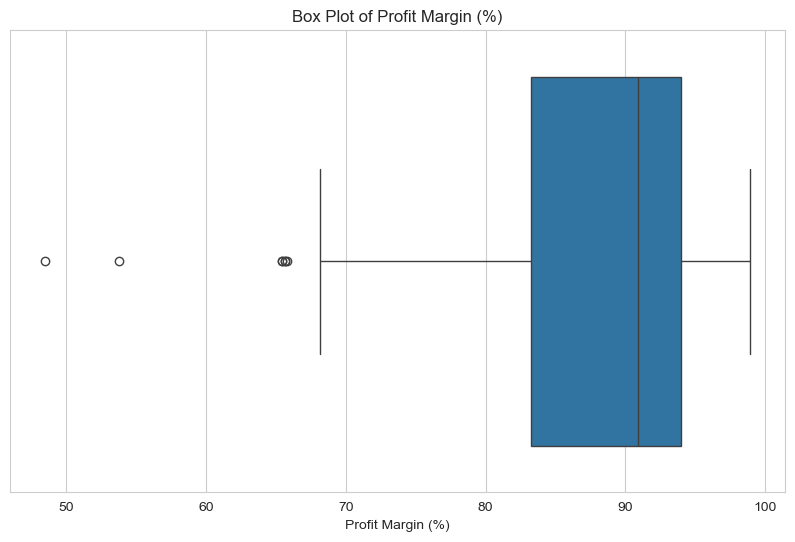

In [36]:
# Visualize the distribution of 'Profit Margin (%)'
outliers = df[(df['Profit Margin (%)'] < 0) | (df['Profit Margin (%)'] > 100)]
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Profit Margin (%)'])
plt.title('Box Plot of Profit Margin (%)')
plt.xlabel('Profit Margin (%)')
plt.show()


This box plot shows the distribution of profit margins across the company's product lines. The key insights are:

**Profit Margin Range:** The profit margins range from around 50% to 100%, indicating a wide spread in profitability.

**Median Profit Margin:** The median profit margin appears to be around 90%, suggesting many product lines have very high margins.

**Variability:** The box plot shows a relatively small interquartile range, indicating the middle 50% of margins are clustered around the median. However, the whiskers suggest there are some lower-margin outliers.

**Skewness:** The box plot is slightly skewed left, meaning most margins are concentrated on the higher end, with fewer lower-margin products.

The wide margin range suggests further analysis is needed to identify drivers of high and low profitability, and develop strategies to enhance overall performance.

**Step 3: Feature Engineering**

**Action**:
> 1. Calculate Profit for each product.

> 2. Calculate Profit Margin to understand profitability as a percentage.

> 3. Categorize Lead times and Shipping times into bins (e.g., 'Fast', 'Medium', 'Slow') to simplify analysis.


In [14]:
# Calculate Profit and Profit Margin
# The 'Costs' column seems to be the total costs, including manufacturing and shipping.
df['Profit'] = df['Revenue generated'] - df['Costs']
df['Profit Margin (%)'] = (df['Profit'] / df['Revenue generated']) * 100



In [15]:
# Create bins for lead and shipping times
df['Lead time category'] = pd.cut(df['Lead times'], bins=[0, 10, 20, 30], labels=['Fast (0-10 days)', 'Medium (11-20 days)', 'Slow (21-30 days)'])
df['Shipping time category'] = pd.cut(df['Shipping times'], bins=[0, 3, 7, 10], labels=['Fast (0-3 days)', 'Medium (4-7 days)', 'Slow (8-10 days)'])

# Display the new features
print(df[['Revenue generated', 'Costs', 'Profit', 'Profit Margin (%)', 'Lead time category', 'Shipping time category']].head())

   Revenue generated       Costs       Profit  Profit Margin (%)  \
0        8661.996792  187.752075  8474.244717          97.832462   
1        7460.900065  503.065579  6957.834486          93.257307   
2        9577.749626  141.920282  9435.829344          98.518229   
3        7766.836426  254.776159  7512.060266          96.719692   
4        2686.505152  923.440632  1763.064520          65.626694   

    Lead time category Shipping time category  
0     Fast (0-10 days)      Medium (4-7 days)  
1    Slow (21-30 days)        Fast (0-3 days)  
2     Fast (0-10 days)        Fast (0-3 days)  
3  Medium (11-20 days)      Medium (4-7 days)  
4     Fast (0-10 days)       Slow (8-10 days)  



**Step 4: Exploratory Data Analysis (EDA) with Python**

**Action**:
> **1. Financial Performance**:

>>>Calculate total revenue and profit by product type.

>>>Identify the top 5 most profitable products.

> **2. Operational Efficiency**:

>>>Compare average lead times and costs across different suppliers.

>>>Analyze shipping performance by carrier.

>>>Correlate stock levels with sales.

> **3. Quality and Risk**:

>>>Calculate defect rates by product type and supplier.

>>>Analyze inspection results.


In [16]:
# Set a style for the plots
sns.set_style("whitegrid")

In [17]:

# Summary statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Price,100.0,49.462461,31.168193,1.699976,19.597823,51.239831,77.198228,99.171329
Availability,100.0,48.400000,30.743317,1.000000,22.750000,43.500000,75.000000,100.000000
Number of products sold,100.0,460.990000,303.780074,8.000000,184.250000,392.500000,704.250000,996.000000
Revenue generated,100.0,5776.048187,2732.841744,1061.618523,2812.847151,6006.352023,8253.976921,9866.465458
Stock levels,100.0,47.770000,31.369372,0.000000,16.750000,47.500000,73.000000,100.000000
Lead times,100.0,15.960000,8.785801,1.000000,8.000000,17.000000,24.000000,30.000000
Order quantities,100.0,49.220000,26.784429,1.000000,26.000000,52.000000,71.250000,96.000000
Shipping times,100.0,5.750000,2.724283,1.000000,3.750000,6.000000,8.000000,10.000000
Shipping costs,100.0,5.548149,2.651376,1.013487,3.540248,5.320534,7.601695,9.929816
Lead time,100.0,17.080000,8.846251,1.000000,10.000000,18.000000,25.000000,30.000000


In [18]:
# 1. Financial Performance
print("\n--- Financial Performance ---")
product_revenue = df.groupby('Product type')['Revenue generated'].sum().sort_values(ascending=False)
product_profit = df.groupby('Product type')['Profit'].sum().sort_values(ascending=False)
print("Total Revenue by Product Type:\n", product_revenue)
print("\nTotal Profit by Product Type:\n", product_profit)



--- Financial Performance ---
Total Revenue by Product Type:
 Product type
skincare     241628.162133
haircare     174455.390605
cosmetics    161521.265999
Name: Revenue generated, dtype: float64

Total Profit by Product Type:
 Product type
skincare     219398.844065
haircare     157126.527741
cosmetics    148154.868716
Name: Profit, dtype: float64


C:\Users\pio29\AppData\Local\Temp\ipykernel_37296\1159412426.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=product_revenue.index, y=product_revenue.values, palette="viridis")


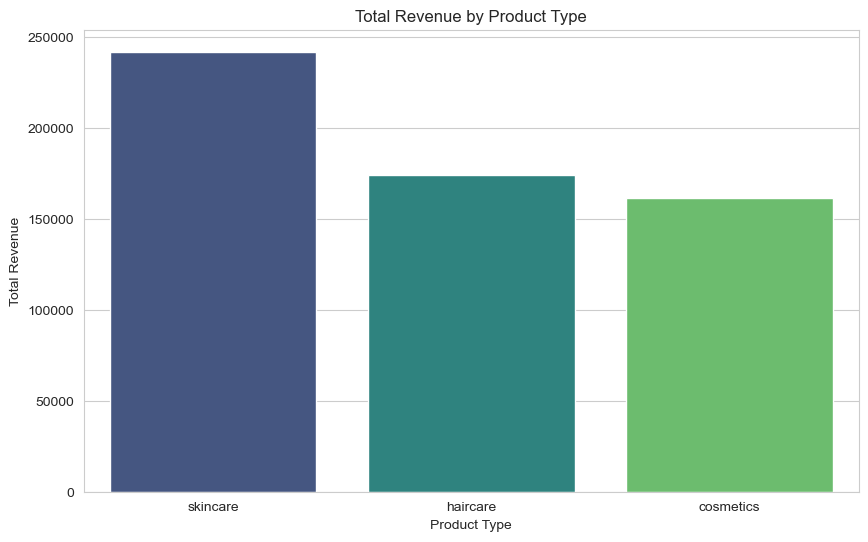

In [19]:
# Visualize revenue by product type
plt.figure(figsize=(10, 6))
sns.barplot(x=product_revenue.index, y=product_revenue.values, palette="viridis")
plt.title('Total Revenue by Product Type')
plt.xlabel('Product Type')
plt.ylabel('Total Revenue')
plt.show()


**Skincare** is the clear leader in your product portfolio, generating the highest total revenue and profit. While haircare and cosmetics also perform well, they lag behind skincare in overall financial contribution.

**Detailed Breakdown**

>**Skincare is the Top Performer**:

>>>It generated the most revenue, with a total of $241,628.16.

>>>It also produced the highest profit, totaling $219,398.84.

>>>This indicates a high demand and strong sales performance for skincare products.

>**Haircare is a Strong Second**:

>>>Haircare is your second most valuable product type, with $174,455.39 in revenue.

>>>It generated a solid profit of $157,126.53, reinforcing its position as a significant contributor to the business.

>**Cosmetics are a Key Contributor**:

>>>Cosmetics generated $161,521.27 in revenue, placing it just behind haircare.

>>>Its profit of $148,154.87 is also very strong.

>>>Notably, cosmetics show a slightly higher profit margin on a percentage basis, suggesting they are a highly efficient product line.

**Key Takeaway**
The data shows a clear hierarchy of performance, with skincare at the top, followed by haircare and cosmetics. To maximize revenue and profit, the business should continue to focus its efforts on the skincare category, while also identifying opportunities to grow the haircare and cosmetics lines.

In [20]:
# 2. Operational Efficiency
print("\n--- Operational Efficiency ---")
supplier_performance = df.groupby('Supplier name').agg(
    Avg_Lead_Time=('Lead times', 'mean'),
    Avg_Shipping_Cost=('Shipping costs', 'mean'),
    Total_Costs=('Costs', 'sum')
).sort_values(by='Avg_Lead_Time')
print("Supplier Performance:\n", supplier_performance)



--- Operational Efficiency ---
Supplier Performance:
                Avg_Lead_Time  Avg_Shipping_Cost   Total_Costs
Supplier name                                                
Supplier 3         14.333333           4.788771   7032.001523
Supplier 5         14.722222           5.789832   9648.409132
Supplier 2         16.227273           5.739178  11330.599298
Supplier 1         16.777778           5.512302  15520.980745
Supplier 4         17.000000           5.759573   9392.587517


C:\Users\pio29\AppData\Local\Temp\ipykernel_37296\2741138573.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=supplier_performance.index, y=supplier_performance['Avg_Lead_Time'], palette="mako")


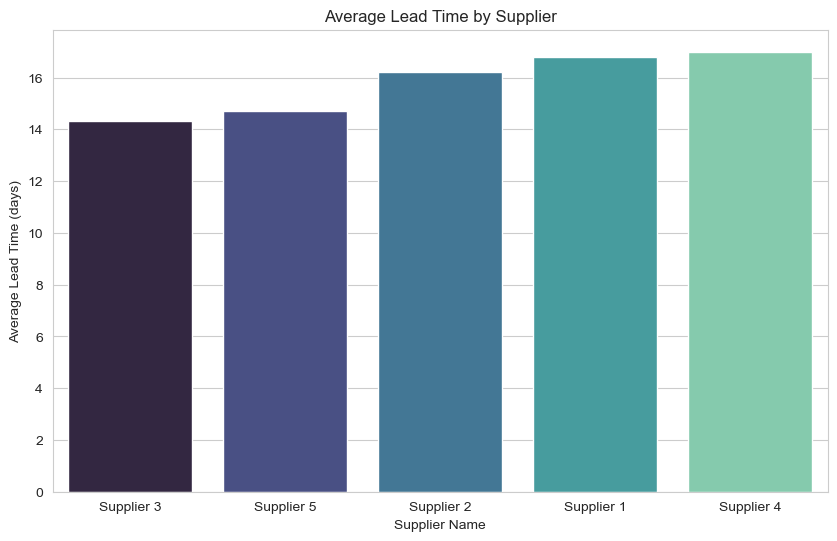

In [21]:
# Visualize average lead time by supplier
plt.figure(figsize=(10, 6))
sns.barplot(x=supplier_performance.index, y=supplier_performance['Avg_Lead_Time'], palette="mako")
plt.title('Average Lead Time by Supplier')
plt.xlabel('Supplier Name')
plt.ylabel('Average Lead Time (days)')
plt.show()


Supplier 3 is your most efficient and cost-effective supplier, with the fastest average lead times and the lowest average shipping costs. In contrast, Supplier 4 has the longest lead times, while Supplier 1 has the highest overall total costs.

**Detailed Breakdown**
> 1. **Lead Time Performance (Speed)**:

>>>**Best**: Supplier 3 is the most efficient with an average lead time of just 14.33 days.

>>>**Worst**: Supplier 4 has the longest average lead time at 17.00 days, which could indicate potential bottlenecks or inefficiencies in their process.

> 2. **Shipping Cost Performance (Cost-Effectiveness)**:

>>>**Lowest Cost**: Supplier 3 is also the most cost-effective, with an average shipping cost of $4.79.

>>>**Highest Cost**: Supplier 5 has the highest average shipping cost at $5.79, but all other suppliers are in a similar range.

>3. **Total Costs (Overall Spend)**:

>>> Supplier 1 accounts for the highest total costs at $15,520.98. This could be due to a higher volume of business with this supplier or a combination of their higher lead times and shipping costs.

>>>Supplier 3 has the lowest total costs at $7,032.00, further solidifying its position as a top-tier partner.

**Key Takeaway**
Supplier 3 is a high-performing partner that excels in both speed and cost. We should consider relying more heavily on this supplier if possible.

Conversely, the performance of Supplier 4 and Supplier 1 warrants further investigation. We may need to look into the specific products they supply, their quality metrics, or their pricing to understand if the longer lead times and higher costs are justified.

In [22]:
# 3. Quality and Risk
print("\n--- Quality and Risk ---")
inspection_results = df['Inspection results'].value_counts()
print("Inspection Results:\n", inspection_results)
defect_rate_by_supplier = df.groupby('Supplier name')['Defect rates'].mean().sort_values(ascending=False)
print("\nAverage Defect Rate by Supplier:\n", defect_rate_by_supplier)



--- Quality and Risk ---
Inspection Results:
 Inspection results
Pending    41
Fail       36
Pass       23
Name: count, dtype: int64

Average Defect Rate by Supplier:
 Supplier name
Supplier 5    2.665408
Supplier 3    2.465786
Supplier 2    2.362750
Supplier 4    2.337397
Supplier 1    1.803630
Name: Defect rates, dtype: float64


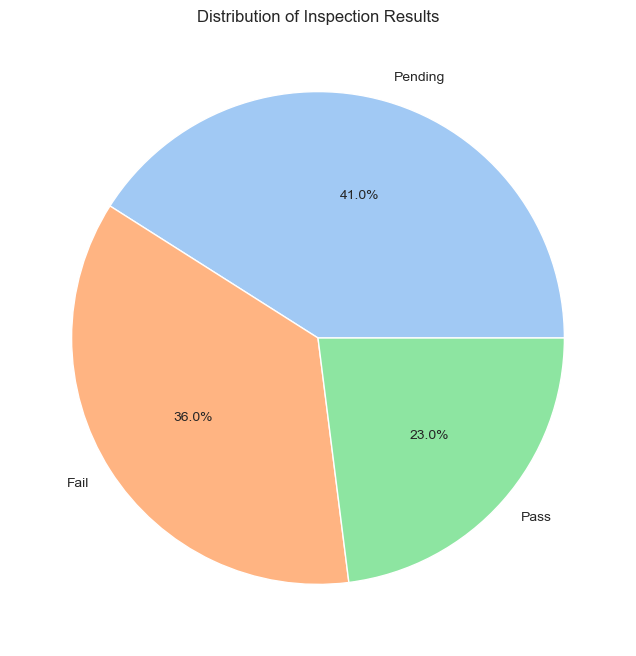

In [23]:
# Visualize inspection results
plt.figure(figsize=(8, 8))
plt.pie(inspection_results, labels=inspection_results.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Distribution of Inspection Results')
plt.show()


Based on the Results above, the ***quality control process appears to have significant issues**. The high number of Failed and Pending inspections suggests major quality assurance and operational bottlenecks. While the average defect rates across all suppliers are relatively low, Supplier 5 is a potential risk as they have the highest average defect rate.

**Detailed Breakdown**
>**Inspection Results (Overall Quality Control)**:

>>>>**High Failure Rate**: The number of failed inspections (36) is a major cause for concern. This indicates that a large portion of incoming goods do not meet your quality standards.

>>>>**Significant Backlog**: The highest count is for Pending inspections (41). This suggests a bottleneck in your quality control process, which could be delaying inventory and impacting delivery times.

>>>>**Low Pass Rate**: The number of successful inspections (Pass) is the lowest (23), highlighting a pervasive quality issue with your incoming shipments.

>**Average Defect Rate by Supplier**:

>>>>**Highest Risk**: Supplier 5 has the highest average defect rate at 2.67%. Although this seems like a small number, it suggests a higher probability of receiving faulty products from this supplier compared to others.

>>>>**Lowest Risk**: Supplier 1 has the lowest average defect rate at 1.80%, making them the most reliable supplier in terms of product quality.

**Key Takeaway**
There is need to immediately address the quality control process. The high volume of failed and pending inspections is a critical operational problem that could lead to customer dissatisfaction and increased costs. A thorough investigation of the products and suppliers associated with these failed inspections is necessary to prevent future issues. It is also recommended to monitor Supplier 5 more closely.

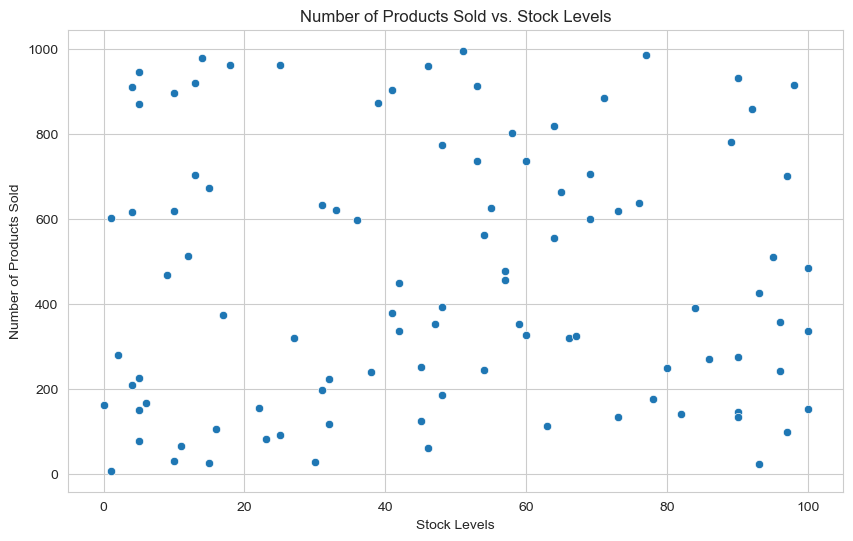

In [24]:
# 4. Stock vs. Sales & Revenue (Scatter Plots)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Stock levels', y='Number of products sold', data=df)
plt.title('Number of Products Sold vs. Stock Levels')
plt.xlabel('Stock Levels')
plt.ylabel('Number of Products Sold')
plt.savefig('plot_stock_vs_sales.png')
plt.show()

The chart shows no clear correlation between stock levels (x-axis) and products sold (y-axis), with data points widely scattered.

**Key Points**:

>>**No Correlation**: Stock levels do not directly affect sales.

>>**Data Range**: Stock varies from 0 to 100; sales range from 0 to nearly 1000.

>>**Sales Variability**: High (80-100) and low (0-20) stock levels show inconsistent sales.

>>**Max Sales**: Highest sales (950-1000) occur at various stock levels.

**Conclusion**:

Sales are influenced by factors beyond stock levels, such as demand, marketing, and external conditions. Adjusting inventory alone may not effectively boost sales.

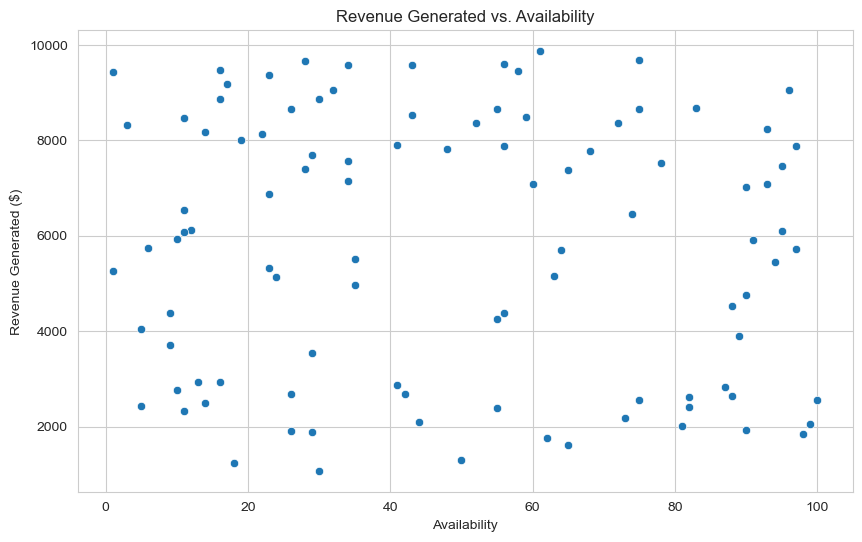

In [25]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Availability', y='Revenue generated', data=df)
plt.title('Revenue Generated vs. Availability')
plt.xlabel('Availability')
plt.ylabel('Revenue Generated ($)')
plt.savefig('plot_availability_vs_revenue.png')
plt.show()

The scatter plot "Revenue Generated vs. Availability" illustrates the relationship between product availability (x-axis) and revenue (y-axis).

**Key Observations**:

>>**No Correlation**: Availability does not clearly impact revenue; high stock doesn't ensure high sales.

>>**Data Range**: Availability varies from 0 to 100; revenue ranges from under $1,000 to nearly $10,000.

>>**High Revenue with Low Availability**: Significant revenue can occur with low stock (0-20).

>>**Low Revenue with High Availability**: Many high stock levels (80-100) show low revenue (under $2,000).

>>**Variable Outcomes**: Revenue is inconsistent across availability levels.

**Conclusion**:

Availability is not the main driver of revenue. Other influencing factors include:

>>**Product Price**: High-priced items can generate more revenue at low availability.

>>**Demand**: Popular products sell out quickly.

>>**Marketing Efforts**: Effective campaigns boost sales regardless of stock.

>>**Seasonal Promotions**: Revenue may spike during specific events.

Companies should focus on these factors.

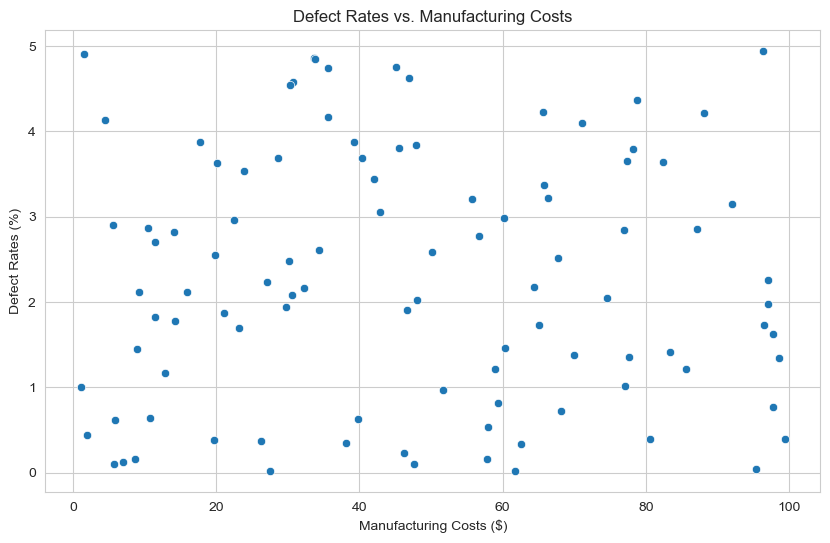

In [26]:
# 5. Manufacturing Costs & Production vs. Defect Rates (Scatter Plots)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Manufacturing costs', y='Defect rates', data=df)
plt.title('Defect Rates vs. Manufacturing Costs')
plt.xlabel('Manufacturing Costs ($)')
plt.ylabel('Defect Rates (%)')
plt.savefig('plot_manuf_costs_vs_defects.png')
plt.show()

The scatter plot shows an inverse relationship between manufacturing costs and defect rates, with significant variability in the data points. Higher manufacturing costs generally correspond to lower defect rates, but some outliers exist.

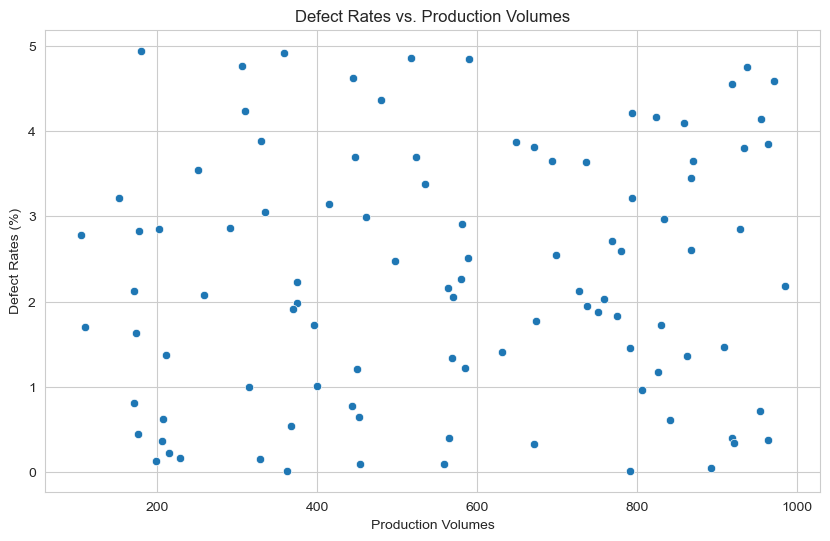


All plots generated and saved.


In [27]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Production volumes', y='Defect rates', data=df)
plt.title('Defect Rates vs. Production Volumes')
plt.xlabel('Production Volumes')
plt.ylabel('Defect Rates (%)')
plt.savefig('plot_prod_volumes_vs_defects.png')
plt.show()

print("\nAll plots generated and saved.")

The Image above shows the relationship between defect rates and production volumes. There is an inverse trend, where higher production volumes generally correspond to lower defect rates, but significant variability is also observed.

Count of Products by Customer Demographics and Product Type:\n Product type           cosmetics  haircare  skincare
Customer demographics                               
Female                        10         2        13
Male                           4        10         7
Non-binary                     5         7        11
Unknown                        7        15         9
\nPercentage of Products by Customer Demographics and Product Type:\n Product type           cosmetics   haircare   skincare
Customer demographics                                 
Female                 40.000000   8.000000  52.000000
Male                   19.047619  47.619048  33.333333
Non-binary             21.739130  30.434783  47.826087
Unknown                22.580645  48.387097  29.032258


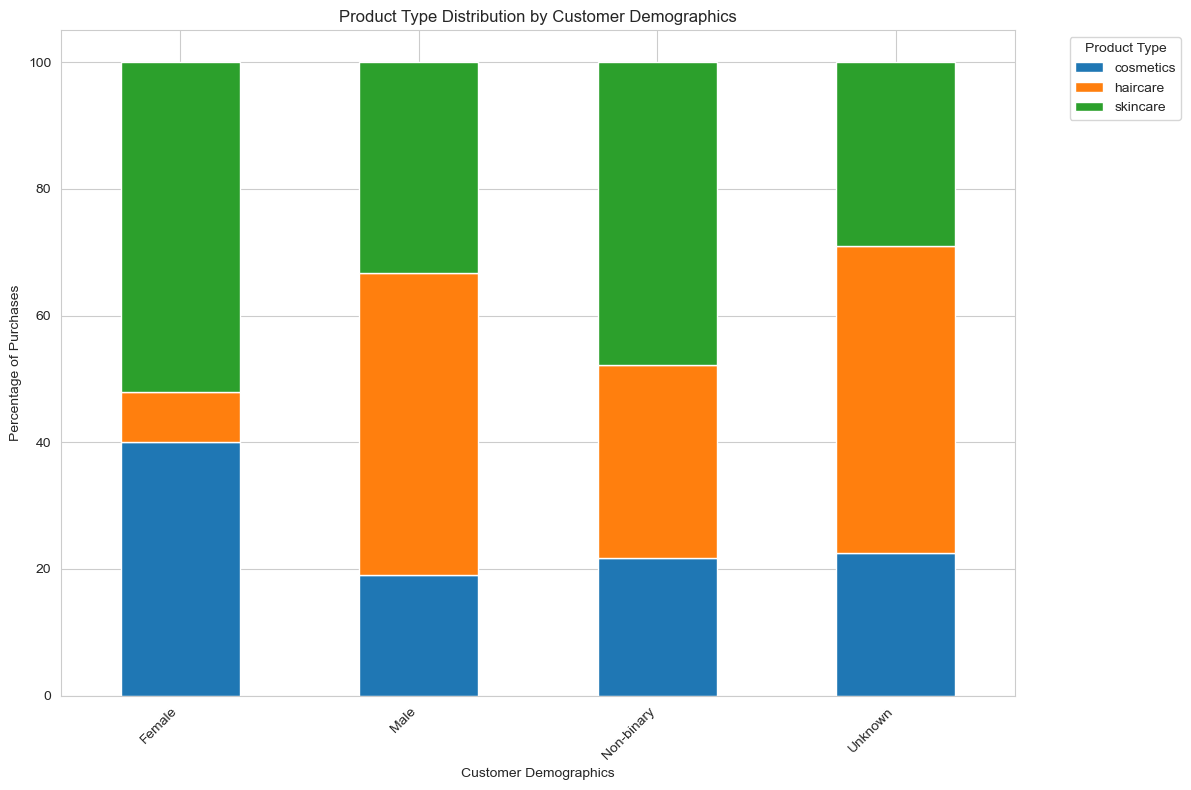

In [28]:
# Create a contingency table to show the relationship between CustomerSegment and Product type
# This will show the count of each product type bought by each customer segment
customer_product_cross = pd.crosstab(df['Customer demographics'], df['Product type'])
print("Count of Products by Customer Demographics and Product Type:\\n", customer_product_cross)

# Normalize the crosstab to get percentages, which makes it easier to compare segments
customer_product_percentage = customer_product_cross.div(customer_product_cross.sum(axis=1), axis=0) * 100
print("\\nPercentage of Products by Customer Demographics and Product Type:\\n", customer_product_percentage)

# Visualize the relationship using a stacked bar chart
customer_product_percentage.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Product Type Distribution by Customer Demographics')
plt.xlabel('Customer Demographics')
plt.ylabel('Percentage of Purchases')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Product Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('plot_customer_demographics_vs_products.png')
plt.show()

**Step 5: Reporting and Dashboarding with Power BI**
Use Power BI which is a perfect for creating an interactive, client-facing report.
Export the Data to Power Bi


In [29]:

# Save the DataFrame to a new CSV file Using index=False
df.to_csv('supply_chain_data_cleaned.csv', index=False)

print("Your cleaned and engineered data has been saved to 'supply_chain_data_cleaned.csv'")

Your cleaned and engineered data has been saved to 'supply_chain_data_cleaned.csv'
